⭕**Prediction of Vaccination**

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [153]:
from google.colab import files
uploaded = files.upload()

Saving h1n1_vaccine_prediction.csv to h1n1_vaccine_prediction (1).csv


In [154]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [155]:
df.shape

(26707, 34)

In [156]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [157]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
11294,11294,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
20489,20489,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Principle City",2.0,2.0,0
21387,21387,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,Below Poverty,Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
8963,8963,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Unemployed,"MSA, Not Principle City",1.0,2.0,0
3971,3971,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0.0,...,White,Male,NaN,NaN,NaN,NaN,"MSA, Not Principle City",0.0,0.0,0
5586,5586,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,Non-MSA,2.0,0.0,1
5055,5055,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
10208,10208,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,Non-MSA,2.0,1.0,0
21987,21987,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,NaN,Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0
9509,9509,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Black,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,2.0,0.0,0


In [158]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [160]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: xlabel='qualification', ylabel='count'>

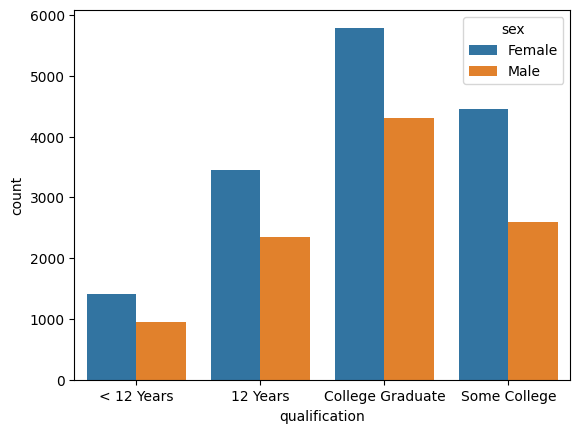

In [161]:
sns.countplot(df,x='qualification',hue='sex')

<Axes: xlabel='marital_status', ylabel='count'>

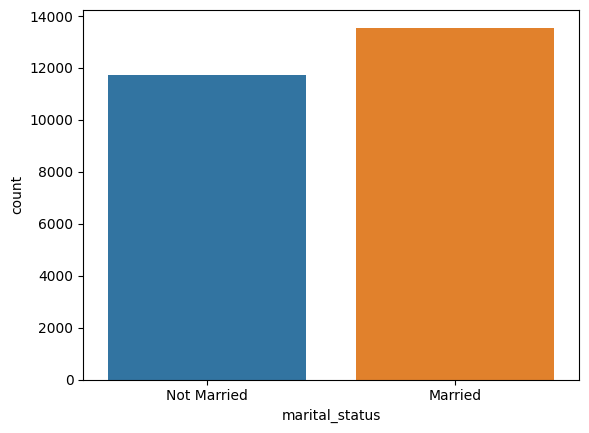

In [162]:
sns.countplot(df,x='marital_status')

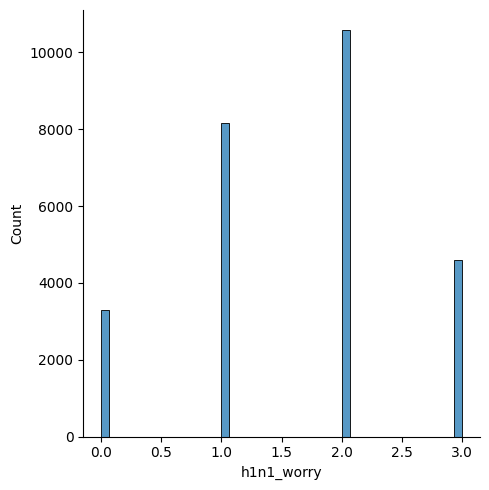

In [163]:
sns.displot(df,x='h1n1_worry')

<Axes: xlabel='h1n1_worry', ylabel='h1n1_awareness'>

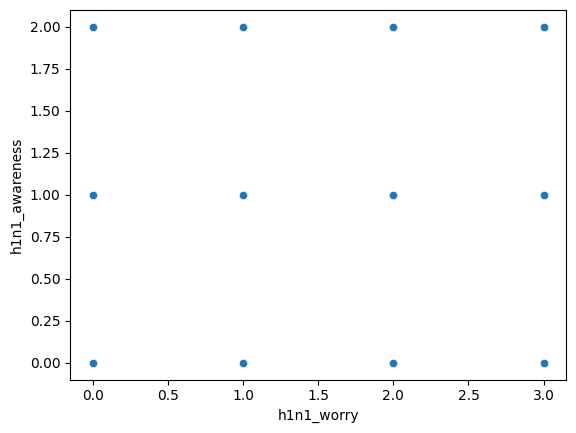

In [164]:
sns.scatterplot(df,x='h1n1_worry',y='h1n1_awareness')

In [165]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [166]:
mean1=df['h1n1_worry'].mean()
mean1
df['h1n1_worry']=df['h1n1_worry'].replace(np.nan,mean1)

In [167]:
mean2=df['h1n1_awareness'].mean()
mean2
df['h1n1_awareness']=df['h1n1_awareness'].replace(np.nan,mean2)

In [168]:
mean3=df['antiviral_medication'].mean()
mean3
df['antiviral_medication']=df['antiviral_medication'].replace(np.nan,mean3)

In [169]:
mean4=df['contact_avoidance'].mean()
mean4
df['contact_avoidance']=df['contact_avoidance'].replace(np.nan,mean4)

In [171]:
mean5=df['bought_face_mask'].mean()
mean5
df['bought_face_mask']=df['bought_face_mask'].replace(np.nan,mean5)

In [172]:
mean6=df['wash_hands_frequently'].mean()
mean6
df['wash_hands_frequently']=df['wash_hands_frequently'].replace(np.nan,mean6)

In [173]:
mean7=df['avoid_large_gatherings'].mean()
mean7
df['avoid_large_gatherings']=df['avoid_large_gatherings'].replace(np.nan,mean7)

In [174]:
mean8=df['reduced_outside_home_cont'].mean()
mean8
df['reduced_outside_home_cont']=df['reduced_outside_home_cont'].replace(np.nan,mean8)

In [175]:
mean9=df['avoid_touch_face'].mean()
mean9
df['avoid_touch_face']=df['avoid_touch_face'].replace(np.nan,mean9)

In [176]:
mean10=df['dr_recc_h1n1_vacc'].mean()
mean10
df['dr_recc_h1n1_vacc']=df['dr_recc_h1n1_vacc'].replace(np.nan,mean10)

In [177]:
mean11=df['dr_recc_seasonal_vacc'].mean()
mean11
df['dr_recc_seasonal_vacc']=df['dr_recc_seasonal_vacc'].replace(np.nan,mean11)

In [178]:
mean12=df['chronic_medic_condition'].mean()
mean12
df['chronic_medic_condition']=df['chronic_medic_condition'].replace(np.nan,mean12)

In [179]:
mean13=df['cont_child_undr_6_mnths'].mean()
mean13
df['cont_child_undr_6_mnths']=df['cont_child_undr_6_mnths'].replace(np.nan,mean13)

In [180]:
mean14=df['is_health_worker'].mean()
mean14
df['is_health_worker']=df['is_health_worker'].replace(np.nan,mean14)

In [181]:
mean15=df['has_health_insur'].mean()
mean15
df['has_health_insur']=df['has_health_insur'].replace(np.nan,mean15)

In [182]:
mean16=df['is_h1n1_vacc_effective'].mean()
mean16
df['is_h1n1_vacc_effective']=df['is_h1n1_vacc_effective'].replace(np.nan,mean16)

In [183]:
mean17=df['is_h1n1_risky'].mean()
mean17
df['is_h1n1_risky']=df['is_h1n1_risky'].replace(np.nan,mean17)

In [184]:
mean18=df['sick_from_h1n1_vacc'].mean()
mean18
df['sick_from_h1n1_vacc']=df['sick_from_h1n1_vacc'].replace(np.nan,mean18)

In [185]:
mean19=df['is_seas_vacc_effective'].mean()
mean19
df['is_seas_vacc_effective']=df['is_seas_vacc_effective'].replace(np.nan,mean19)

In [186]:
mean20=df['is_seas_risky'].mean()
mean20
df['is_seas_risky']=df['is_seas_risky'].replace(np.nan,mean20)

In [187]:
mean21=df['sick_from_seas_vacc'].mean()
mean21
df['sick_from_seas_vacc']=df['sick_from_seas_vacc'].replace(np.nan,mean21)

In [188]:
mode1=df['qualification'].mode().values[0]
mode1

'College Graduate'

In [189]:
df['qualification']=df['qualification'].replace(np.nan,mode1)

In [190]:
mode2=df['income_level'].mode().values[0]
mode2

'<= $75,000, Above Poverty'

In [191]:
df['income_level']=df['income_level'].replace(np.nan,mode2)

In [192]:
mode3=df['marital_status'].mode().values[0]
mode3

'Married'

In [193]:
df['marital_status']=df['marital_status'].replace(np.nan,mode3)

In [194]:
mode4=df['housing_status'].mode().values[0]
mode4

'Own'

In [195]:
df['housing_status']=df['housing_status'].replace(np.nan,mode4)

In [196]:
mode5=df['employment'].mode().values[0]
mode5

'Employed'

In [197]:
df['employment']=df['employment'].replace(np.nan,mode5)

In [198]:
mean22=df['no_of_adults'].mean()
mean22

0.8864993574722201

In [199]:
df['no_of_adults']=df['no_of_adults'].replace(np.nan,mean22)

In [200]:
mean23=df['no_of_children'].mean()
mean23

0.5345831128581148

In [201]:
df['no_of_children']=df['no_of_children'].replace(np.nan,mean23)

In [202]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [203]:
df = df.astype({"h1n1_worry":'int', "h1n1_awareness":'int',"antiviral_medication":'int',"contact_avoidance":'int',"bought_face_mask":'int',
                "wash_hands_frequently":'int',"avoid_large_gatherings":'int',"reduced_outside_home_cont":'int',"avoid_touch_face":'int',"dr_recc_h1n1_vacc":'int',
                "dr_recc_seasonal_vacc":'int',"chronic_medic_condition":'int',"cont_child_undr_6_mnths":'int',"is_health_worker":'int',"has_health_insur":'int',
                "is_h1n1_vacc_effective":'int',"is_h1n1_risky":'int',"sick_from_h1n1_vacc":'int',"is_seas_vacc_effective":'int',"is_seas_risky":'int',
                "sick_from_seas_vacc":'int',"no_of_adults":'int',"no_of_children":'int'})

In [204]:
df.dtypes

unique_id                     int64
h1n1_worry                    int64
h1n1_awareness                int64
antiviral_medication          int64
contact_avoidance             int64
bought_face_mask              int64
wash_hands_frequently         int64
avoid_large_gatherings        int64
reduced_outside_home_cont     int64
avoid_touch_face              int64
dr_recc_h1n1_vacc             int64
dr_recc_seasonal_vacc         int64
chronic_medic_condition       int64
cont_child_undr_6_mnths       int64
is_health_worker              int64
has_health_insur              int64
is_h1n1_vacc_effective        int64
is_h1n1_risky                 int64
sick_from_h1n1_vacc           int64
is_seas_vacc_effective        int64
is_seas_risky                 int64
sick_from_seas_vacc           int64
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [205]:
## check for duplicates
duplicate=df.duplicated()
duplicate.sum()

0

<Axes: xlabel='unique_id'>

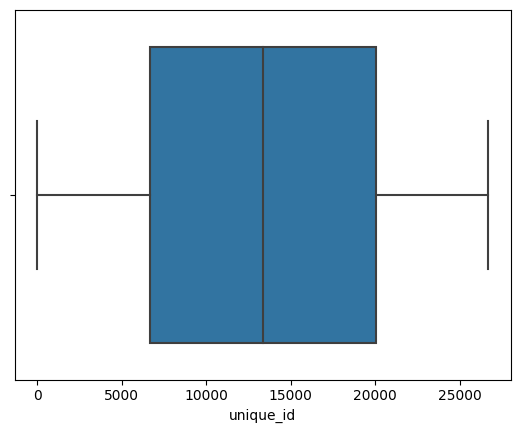

In [206]:
sns.boxplot(data=df,x='unique_id')

<Axes: xlabel='dr_recc_h1n1_vacc'>

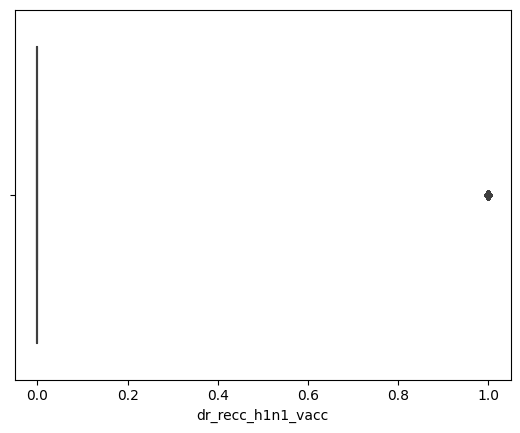

In [207]:
sns.boxplot(data=df,x='dr_recc_h1n1_vacc')

<Axes: xlabel='cont_child_undr_6_mnths'>

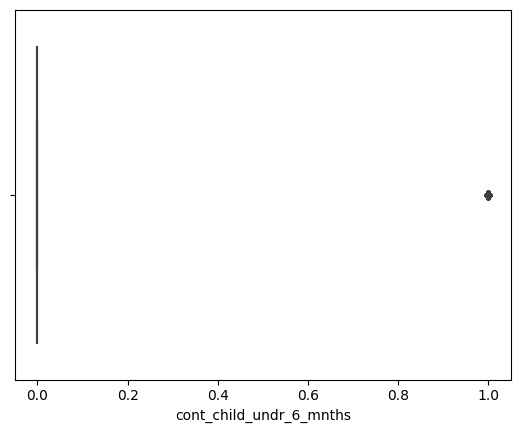

In [208]:
sns.boxplot(data=df,x='cont_child_undr_6_mnths')

<Axes: xlabel='is_health_worker'>

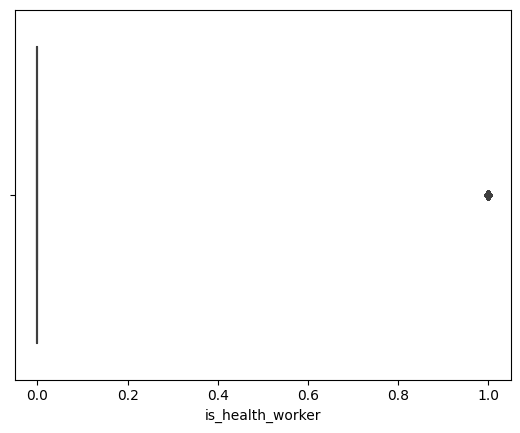

In [209]:
sns.boxplot(data=df,x='is_health_worker')

In [210]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  iqr=q3-q1
  lower_range=q1-1.5*iqr
  upper_range=q3+1.5*iqr
  return lower_range,upper_range

In [211]:
lowage,uppage=remove_outlier(df['dr_recc_h1n1_vacc'])
df['dr_recc_h1n1_vacc']=np.where(df['dr_recc_h1n1_vacc']>uppage,uppage,df['dr_recc_h1n1_vacc'])
df['dr_recc_h1n1_vacc']=np.where(df['dr_recc_h1n1_vacc']<lowage,lowage,df['dr_recc_h1n1_vacc'])

In [212]:
lowage,uppage=remove_outlier(df['antiviral_medication'])
df['antiviral_medication']=np.where(df['antiviral_medication']>uppage,uppage,df['antiviral_medication'])
df['antiviral_medication']=np.where(df['antiviral_medication']<lowage,lowage,df['antiviral_medication'])

In [213]:
lowage,uppage=remove_outlier(df['bought_face_mask'])
df['bought_face_mask']=np.where(df['bought_face_mask']>uppage,uppage,df['bought_face_mask'])
df['bought_face_mask']=np.where(df['bought_face_mask']<lowage,lowage,df['bought_face_mask'])

In [214]:
lowage,uppage=remove_outlier(df['wash_hands_frequently'])
df['wash_hands_frequently']=np.where(df['wash_hands_frequently']>uppage,uppage,df['wash_hands_frequently'])
df['wash_hands_frequently']=np.where(df['wash_hands_frequently']<lowage,lowage,df['wash_hands_frequently'])

In [215]:
lowage,uppage=remove_outlier(df['cont_child_undr_6_mnths'])
df['cont_child_undr_6_mnths']=np.where(df['cont_child_undr_6_mnths']>uppage,uppage,df['cont_child_undr_6_mnths'])
df['cont_child_undr_6_mnths']=np.where(df['cont_child_undr_6_mnths']<lowage,lowage,df['cont_child_undr_6_mnths'])

In [216]:
lowage,uppage=remove_outlier(df['is_health_worker'])
df['is_health_worker']=np.where(df['is_health_worker']>uppage,uppage,df['is_health_worker'])
df['is_health_worker']=np.where(df['is_health_worker']<lowage,lowage,df['is_health_worker'])

In [217]:
lowage,uppage=remove_outlier(df['no_of_children'])
df['no_of_children']=np.where(df['no_of_children']>uppage,uppage,df['no_of_children'])
df['no_of_children']=np.where(df['no_of_children']<lowage,lowage,df['no_of_children'])

In [218]:
lowage,uppage=remove_outlier(df['no_of_adults'])
df['no_of_adults']=np.where(df['no_of_adults']>uppage,uppage,df['no_of_adults'])
df['no_of_adults']=np.where(df['no_of_adults']<lowage,lowage,df['no_of_adults'])

In [219]:
lowage,uppage=remove_outlier(df['has_health_insur'])
df['has_health_insur']=np.where(df['has_health_insur']>uppage,uppage,df['has_health_insur'])
df['has_health_insur']=np.where(df['has_health_insur']<lowage,lowage,df['has_health_insur'])

In [220]:
lowage,uppage=remove_outlier(df['sick_from_seas_vacc'])
df['sick_from_seas_vacc']=np.where(df['sick_from_seas_vacc']>uppage,uppage,df['sick_from_seas_vacc'])
df['sick_from_seas_vacc']=np.where(df['sick_from_seas_vacc']<lowage,lowage,df['sick_from_seas_vacc'])

<Axes: xlabel='has_health_insur'>

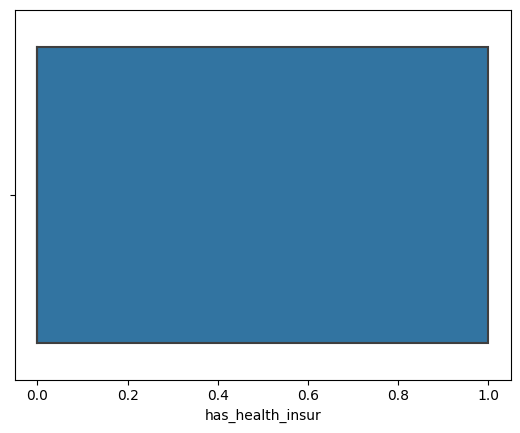

In [221]:
sns.boxplot(data=df,x='has_health_insur')

<Axes: xlabel='cont_child_undr_6_mnths'>

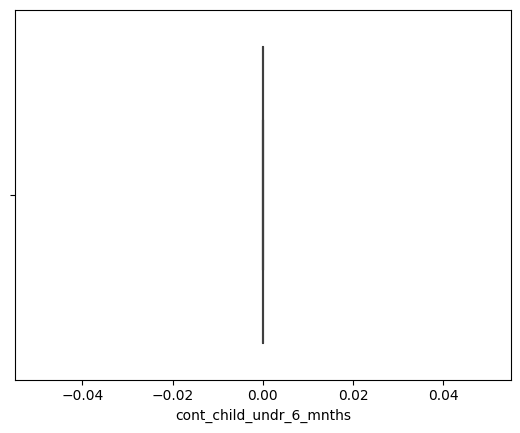

In [222]:
sns.boxplot(data=df,x='cont_child_undr_6_mnths')

In [223]:
df['antiviral_medication'] = df['antiviral_medication'].apply(np.int64)
df['bought_face_mask'] = df['bought_face_mask'].apply(np.int64)
df['wash_hands_frequently'] = df['wash_hands_frequently'].apply(np.int64)
df['dr_recc_h1n1_vacc'] = df['dr_recc_h1n1_vacc'].apply(np.int64)

df['cont_child_undr_6_mnths'] = df['cont_child_undr_6_mnths'].apply(np.int64)
df['is_health_worker'] = df['is_health_worker'].apply(np.int64)

df['has_health_insur'] = df['has_health_insur'].apply(np.int64)
df['sick_from_seas_vacc'] = df['sick_from_seas_vacc'].apply(np.int64)

df['no_of_adults'] = df['no_of_adults'].apply(np.int64)
df['no_of_children'] = df['no_of_children'].apply(np.int64)

In [224]:
df.dtypes

unique_id                     int64
h1n1_worry                    int64
h1n1_awareness                int64
antiviral_medication          int64
contact_avoidance             int64
bought_face_mask              int64
wash_hands_frequently         int64
avoid_large_gatherings        int64
reduced_outside_home_cont     int64
avoid_touch_face              int64
dr_recc_h1n1_vacc             int64
dr_recc_seasonal_vacc         int64
chronic_medic_condition       int64
cont_child_undr_6_mnths       int64
is_health_worker              int64
has_health_insur              int64
is_h1n1_vacc_effective        int64
is_h1n1_risky                 int64
sick_from_h1n1_vacc           int64
is_seas_vacc_effective        int64
is_seas_risky                 int64
sick_from_seas_vacc           int64
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [225]:
## Encoding
df=pd.get_dummies(df, columns=["age_bracket",'qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa'])

In [226]:
df.dtypes

unique_id                                 int64
h1n1_worry                                int64
h1n1_awareness                            int64
antiviral_medication                      int64
contact_avoidance                         int64
bought_face_mask                          int64
wash_hands_frequently                     int64
avoid_large_gatherings                    int64
reduced_outside_home_cont                 int64
avoid_touch_face                          int64
dr_recc_h1n1_vacc                         int64
dr_recc_seasonal_vacc                     int64
chronic_medic_condition                   int64
cont_child_undr_6_mnths                   int64
is_health_worker                          int64
has_health_insur                          int64
is_h1n1_vacc_effective                    int64
is_h1n1_risky                             int64
sick_from_h1n1_vacc                       int64
is_seas_vacc_effective                    int64
is_seas_risky                           

In [227]:
## split into x and y
x=df.drop('h1n1_vaccine',axis=1)
y=df['h1n1_vaccine']

In [228]:
## training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [229]:
## DecisionTreeClassifier
model_1=DecisionTreeClassifier(max_depth=3)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [230]:
model_1.score(x_train,y_train)

0.8202096929496095

In [231]:
model_1.score(x_test,y_test)

0.8244103332085362

In [232]:
### Logistic Regression

In [233]:
model_2=LogisticRegression()
model_2.fit(x_train,y_train)

LogisticRegression()

In [234]:
model_2.score(x_train,y_train)

0.8214400342355836

In [235]:
model_2.score(x_test,y_test)

0.8241607387994508

In [236]:
### Bagging

In [237]:
from sklearn.ensemble import BaggingClassifier

In [244]:
model_3=BaggingClassifier(n_estimators=1)
model_3.fit(x_train,y_train)

BaggingClassifier(n_estimators=1)

In [249]:
model_3.score(x_train,y_train)

0.907456938054991

In [250]:
model_3.score(x_test,y_test)

0.748284038437539

In [251]:
## Boosting

In [252]:
from sklearn.ensemble import AdaBoostClassifier

In [253]:
model_4=AdaBoostClassifier(n_estimators=90)
model_4.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=90)

In [254]:
model_4.score(x_train,y_train)

0.8344923504867872

In [255]:
model_4.score(x_test,y_test)

0.8352676900037439

In [256]:
### RandomForestClassifier

In [257]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
model_5=RandomForestClassifier(n_estimators=90)
model_5.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90)

In [259]:
model_5.score(x_train,y_train)

1.0

In [260]:
model_5.score(x_test,y_test)

0.8377636340945963

In [261]:
## additional

In [262]:
# prediction with model

In [263]:
y_pred=model_2.predict(x_test)

In [264]:
# model evaluation
model_2.predict(x.iloc[460:,:])
round(model_2.score(x,y),4)

0.8223

In [265]:
# model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8241607387994508

In [266]:
## confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6022,  308],
       [1101,  582]])

In [267]:
# model classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6330
           1       0.65      0.35      0.45      1683

    accuracy                           0.82      8013
   macro avg       0.75      0.65      0.67      8013
weighted avg       0.81      0.82      0.80      8013



In [274]:
## future prediction
x_new=x.sample(40)

In [275]:
#define x_new
x_new

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
15335,15335,1,1,0,1,0,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
7699,7699,2,1,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
13470,13470,2,0,0,1,0,1,1,1,1,...,1,0,1,0,1,0,0,0,0,1
17739,17739,2,1,0,0,0,1,1,0,0,...,0,1,0,1,1,0,0,1,0,0
4155,4155,0,2,0,0,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
8516,8516,2,1,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
2594,2594,2,2,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
7426,7426,1,1,0,1,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
9459,9459,1,2,0,1,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
21694,21694,2,2,0,1,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [276]:
#predict for x_new
model_4.predict(x_new)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])